In [1350]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Clean and preprocess the budget data, handling missing values, standardizing formats, 
# and ensuring data consistency. 
# Perform initial checks to ensure the dataset is ready for analysis.

In [1351]:
#Loading the data into dataframes

In [1352]:
budget_path_2019 = Path("approved-operating-budget-summary-2019.xlsx") #2019
budget2019_df = pd.read_excel(budget_path_2019, sheet_name='2019')
budget_path_2020 = Path("approved-operating-budget-summary-2020.xlsx") #2020
budget2020_df = pd.read_excel(budget_path_2020, sheet_name='open data')
budget_path_2021 = Path("approved-operating-budget-summary-2021.xlsx") #2021
budget2021_df = pd.read_excel(budget_path_2021, sheet_name='2021')
budget_path_2022 = Path("approved-operating-budget-summary-2022.xlsx") #2022
budget2022_df = pd.read_excel(budget_path_2022, sheet_name='Open Data')
budget_path_2023 = Path("approved-operating-budget-summary-2023.xlsx") #2023
budget2023_df = pd.read_excel(budget_path_2023, sheet_name='Open Data')

In [1353]:
#Checking for null values using the isnull function, and printing the number of null values in the data frame

In [1354]:
null_2019 = budget2019_df.isnull()   #checking for null values
null_per_column_2019 = null_2019.sum()
print(null_per_column_2019)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64


In [1355]:
null_2020 = budget2020_df.isnull() #checking for null values
null_per_column_2020 = null_2020.sum()
print(null_per_column_2020)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64


In [1356]:
null_2021  = budget2021_df.isnull() #checking for null values
null_per_column_2021 = null_2021.sum()
print(null_per_column_2021)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64


In [1357]:
null_2022 = budget2022_df.isnull()  #checking for null values
null_per_column_2022 = null_2022.sum()
print(null_per_column_2022)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64


In [1358]:
null_2023 = budget2023_df.isnull()    #checking for null values
null_per_column_2023 = null_2023.sum()
print(null_per_column_2023)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2023                 0
dtype: int64


In [1359]:
#Renaming the last column in the data set to Budgeted Amount Year

In [1360]:
budget2019_df.rename(columns={2019.0: 'Budgeted amount 2019'}, inplace=True)
budget2020_df.rename(columns={2020.0: 'Budgeted amount 2020'}, inplace=True)
budget2021_df.rename(columns={2021.0: 'Budgeted amount 2021'}, inplace=True)
budget2022_df.rename(columns={2022.0: 'Budgeted amount 2022'}, inplace=True)
budget2023_df.rename(columns={2023.0: 'Budgeted amount 2023'}, inplace=True)

In [1361]:
#Checking for duplicates 

In [1362]:
##  Counts number of values in each dataframe before dropping duplicates

In [1363]:
budget2019_df.count()

Program                 19428
Service                 19428
Activity                19428
Expense/Revenue         19428
Category Name           19428
Sub-Category Name       19428
Commitment item         19428
Budgeted amount 2019    19428
dtype: int64

In [1364]:
budget2020_df.count()

Program                 17779
Service                 17779
Activity                17779
Expense/Revenue         17779
Category Name           17779
Sub-Category Name       17779
Commitment item         17779
Budgeted amount 2020    17779
dtype: int64

In [1365]:
budget2021_df.count()

Program                 20816
Service                 20816
Activity                20816
Expense/Revenue         20816
Category Name           20816
Sub-Category Name       20816
Commitment item         20816
Budgeted amount 2021    20816
dtype: int64

In [1366]:
budget2022_df.count()

Program                 19714
Service                 19714
Activity                19714
Expense/Revenue         19714
Category Name           19714
Sub-Category Name       19714
Commitment item         19714
Budgeted amount 2022    19714
dtype: int64

In [1367]:
budget2023_df.count()

Program                 20127
Service                 20127
Activity                20127
Expense/Revenue         20127
Category Name           20127
Sub-Category Name       20127
Commitment item         20127
Budgeted amount 2023    20127
dtype: int64

In [1368]:
##Dropping duplicates

budget2019_df.drop_duplicates(subset = 'Budgeted amount 2019')
budget2020_df.drop_duplicates(subset = 'Budgeted amount 2020')
budget2021_df.drop_duplicates(subset = 'Budgeted amount 2021')
budget2022_df.drop_duplicates(subset = 'Budgeted amount 2022')
budget2023_df.drop_duplicates(subset = 'Budgeted amount 2023')

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount 2023
0,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Canada Pension Plan,63293.40
1,311 Toronto,311 Development,311 PMO,Expenses,Service And Rent,Telecommnuncation,Cellular Telephones,2830.00
2,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Comprehensive Medical,72595.32
3,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Dental Plan,37800.96
4,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Employment Insurance,22992.96
...,...,...,...,...,...,...,...,...
20114,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Expenses,714500.00
20115,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Professional And Technical Service,66000.00
20123,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserves,-33519.00
20124,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,User Fees,"Fees, Service Charges",-836250.00


In [1369]:
##Checking if count values changed after dropping duplicates

In [1370]:
budget2019_df.count()

Program                 19428
Service                 19428
Activity                19428
Expense/Revenue         19428
Category Name           19428
Sub-Category Name       19428
Commitment item         19428
Budgeted amount 2019    19428
dtype: int64

In [1371]:
budget2020_df.count()

Program                 17779
Service                 17779
Activity                17779
Expense/Revenue         17779
Category Name           17779
Sub-Category Name       17779
Commitment item         17779
Budgeted amount 2020    17779
dtype: int64

In [1372]:
budget2021_df.count()

Program                 20816
Service                 20816
Activity                20816
Expense/Revenue         20816
Category Name           20816
Sub-Category Name       20816
Commitment item         20816
Budgeted amount 2021    20816
dtype: int64

In [1373]:
budget2022_df.count()

Program                 19714
Service                 19714
Activity                19714
Expense/Revenue         19714
Category Name           19714
Sub-Category Name       19714
Commitment item         19714
Budgeted amount 2022    19714
dtype: int64

In [1374]:
budget2023_df.count()

Program                 20127
Service                 20127
Activity                20127
Expense/Revenue         20127
Category Name           20127
Sub-Category Name       20127
Commitment item         20127
Budgeted amount 2023    20127
dtype: int64

In [1375]:
#Checking if data types are consistent in the datasets

In [1376]:
budget2019_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2019    float64
dtype: object

In [1377]:
budget2020_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2020    float64
dtype: object

In [1378]:
budget2021_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2021    float64
dtype: object

In [1379]:
budget2022_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2022    float64
dtype: object

In [1380]:
budget2023_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2023    float64
dtype: object

In [1381]:
#Seperating the data into different dataframes based on if they are expense or revenue

In [1382]:
budget2019_df_exp = budget2019_df[budget2019_df['Expense/Revenue']=='Expenses']
budget2019_df_rev = budget2019_df[budget2019_df['Expense/Revenue']=='Revenues']

In [1383]:
budget2020_df_exp = budget2020_df[budget2020_df['Expense/Revenue']=='Expenses']
budget2020_df_rev = budget2020_df[budget2020_df['Expense/Revenue']=='Revenues']

In [1384]:
budget2021_df_exp = budget2021_df[budget2021_df['Expense/Revenue']=='Expenses']
budget2021_df_rev = budget2021_df[budget2021_df['Expense/Revenue']=='Revenues']

In [1385]:
budget2022_df_exp = budget2022_df[budget2022_df['Expense/Revenue']=='Expenses']
budget2022_df_rev = budget2022_df[budget2022_df['Expense/Revenue']=='Revenues']

In [1386]:
budget2023_df_exp = budget2023_df[budget2023_df['Expense/Revenue']=='Expenses']
budget2023_df_rev = budget2023_df[budget2023_df['Expense/Revenue']=='Revenues']
budget2023_df_exp

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount 2023
0,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Canada Pension Plan,63293.40
1,311 Toronto,311 Development,311 PMO,Expenses,Service And Rent,Telecommnuncation,Cellular Telephones,2830.00
2,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Comprehensive Medical,72595.32
3,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Dental Plan,37800.96
4,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Employment Insurance,22992.96
...,...,...,...,...,...,...,...,...
20118,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Audit,10000.00
20119,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Legal,2500.00
20120,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Rentals,Rental Of Office,80000.00
20121,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Telecommnuncation,Telephone,25000.00


##Defining Years for all futhure calculations

In [1401]:
years = [2019, 2020, 2021, 2022, 2023]

#Calculating Category wise total budget amount and converting it in multiples of 10^6 
#Converting the Budget amount in Millions

In [1402]:
# Create an empty dictionary to store DataFrames for each year
category_dfs_ak = []

for year in years:
    budget_df = globals()[f"budget{year}_df_exp"]
    category_df = budget_df.groupby("Category Name")[f"Budgeted amount {year}"].sum().reset_index()
    category_dfs_ak.append(category_df)
    
    
# category_dfs now contains DataFrames for each year (2019 to 2023)
# You can access them using category_dfs[0], category_dfs[1], ..., category_dfs[4]
for df in category_dfs_ak:
    print(df)

                            Category Name  Budgeted amount 2019
0                 Contribution To Capital          3.434535e+08
1  Contribution To Reserves/Reserve Funds          1.374326e+09
2                               Equipment          6.256912e+07
3                Inter-Divisional Charges          3.161485e+08
4                    Materials & Supplies          7.350229e+08
5                      Other Expenditures          2.711142e+09
6                   Salaries And Benefits          5.928046e+09
7                        Service And Rent          2.082853e+09
                            Category Name  Budgeted amount 2020
0                 Contribution To Capital          3.434555e+08
1  Contribution To Reserves/Reserve Funds          1.492208e+09
2                               Equipment          6.305564e+07
3                Inter-Divisional Charges          1.569948e+08
4                    Materials & Supplies          7.344638e+08
5                      Other Expenditure

Merging the Category wise Budget Amount Dataframe to a single Dataframe

In [1403]:
# Merge category_df_2019_ak and category_df_2020_ak on "Category Name"
merged_df_ak = pd.merge(category_df_2019_ak, category_df_2020_ak, on="Category Name", how="outer")

# Merge the result with category_df_2021 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2021_ak, on="Category Name", how="outer")

# Merge the result with category_df_2022 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2022_ak, on="Category Name", how="outer")

# Merge the result with category_df_2023 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2023_ak, on="Category Name", how="outer")

merged_df_ak

,Category Name,Budget Data 2019,Budget Data 2020,Budget Data 2021,Budget Data 2022,Budget Data 2023
0,Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
1,Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
2,Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
3,Inter-Divisional Charges,3.161485e+08,1.569948e+08,NaN,3.124781e+08,3.197343e+08
4,Materials & Supplies,7.350229e+08,7.344638e+08,8.132793e+08,8.103749e+08,8.393636e+08
5,Other Expenditures,2.711142e+09,2.611534e+09,2.835059e+09,2.776243e+09,3.063181e+09
6,Salaries And Benefits,5.928046e+09,6.092481e+09,NaN,NaN,NaN
7,Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
8,Benefits,NaN,NaN,1.450706e+09,1.488014e+09,1.586110e+09
9,Salaries,NaN,NaN,4.781880e+09,5.108580e+09,5.313474e+09


In [1404]:
# Rounding off the budget amount to millions (10^6)

# Define a function to divide numbers by 10^6 and round to 3 decimal places
divide_and_round_ak = lambda x: round(float(x) / 1e6, 2) if pd.to_numeric(x, errors='coerce') == x else str(x)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final = merged_df_ak.applymap(divide_and_round_ak)

#Renaming the column as Expense and year
merged_df_ak_final=merged_df_ak_final.rename(columns={
      "Category Name":"Category Name",
      "Budget Data 2019":"Expense 2019(millions)",
      "Budget Data 2020":"Expense 2020(millions)",
      "Budget Data 2021":"Expense 2021(millions)",
      "Budget Data 2022":"Expense 2022(millions)",
      "Budget Data 2023":"Expense 2023(millions)"
    
})
merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.5,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,nan,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,nan,nan,nan
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
8,Benefits,nan,nan,1450.71,1488.01,1586.11
9,Salaries,nan,nan,4781.88,5108.58,5313.47


#Data Cleaning for abova Category wise DataFrame

In [1405]:
# Replace 'nan' strings with actual NaN values
merged_df_ak_final.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final.fillna(0, inplace=True)

# Adding Salaries And Benefits for year 2021,2022,2023
salaries_2021 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2021(millions)'].sum()
salaries_2022 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2022(millions)'].sum()
salaries_2023 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Expense 2023(millions)'].sum()

# Update the "Salaries And Benefits" column from above value for year 2021,2022,2023
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2021(millions)'] = salaries_2021
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2022(millions)'] = salaries_2022
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Expense 2023(millions)'] = salaries_2023

#Drop the last two columns since the value was already aaded up in column no 6
merged_df_ak_final=merged_df_ak_final.drop([8,9])
merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
2,Equipment,62.57,63.06,63.06,69.63,74.92
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14


#Adding all categories indivisually year wise and sorting it based on total, so that highest expense category is on top

In [1406]:
# Extract the non-numeric columns (assuming the first column is non-numeric)
non_numeric_columns = merged_df_ak_final.columns[1:]

# Convert non-numeric values to NaN and then sum each row
merged_df_ak_final['Total'] = merged_df_ak_final[non_numeric_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Sort the DataFrame based on the "Total" column in descending order
merged_df_ak_final = merged_df_ak_final.sort_values("Total", ascending=False)

# Display the updated and sorted DataFrame
merged_df_ak_final=merged_df_ak_final.drop(['Total'], axis=1)
merged_df_ak_final

,Category Name,Expense 2019(millions),Expense 2020(millions),Expense 2021(millions),Expense 2022(millions),Expense 2023(millions)
6,Salaries And Benefits,5928.05,6092.48,6232.59,6596.59,6899.58
5,Other Expenditures,2711.14,2611.53,2835.06,2776.24,3063.18
7,Service And Rent,2082.85,2178.26,2342.04,2632.93,3071.14
1,Contribution To Reserves/Reserve Funds,1374.33,1492.21,1569.50,679.06,817.74
4,Materials & Supplies,735.02,734.46,813.28,810.37,839.36
0,Contribution To Capital,343.45,343.46,349.53,347.76,345.49
3,Inter-Divisional Charges,316.15,156.99,0.00,312.48,319.73
2,Equipment,62.57,63.06,63.06,69.63,74.92


#Analysing the year wise total expense(in million) and also in pecentage increase with comparison to total

In [1407]:
# Assuming merged_df_ak_final is your DataFrame

for year in years:
    column_name = f"Expense {year}(millions)"
    merged_df_ak_final[column_name] = pd.to_numeric(merged_df_ak_final[column_name], errors='coerce')

total_2019_ak = merged_df_ak_final["Expense 2019(millions)"].sum()
total_2020_ak = merged_df_ak_final["Expense 2020(millions)"].sum()
total_2021_ak = merged_df_ak_final["Expense 2021(millions)"].sum()
total_2022_ak = merged_df_ak_final["Expense 2022(millions)"].sum()
total_2023_ak = merged_df_ak_final["Expense 2023(millions)"].sum()

# Create a DataFrame with the totals
total_df_ak = pd.DataFrame([
    {"Year": "2019", "Total Expense(millions)": total_2019_ak},
    {"Year": "2020", "Total Expense(millions)": total_2020_ak},
    {"Year": "2021", "Total Expense(millions)": total_2021_ak},
    {"Year": "2022", "Total Expense(millions)": total_2022_ak},
    {"Year": "2023", "Total Expense(millions)": total_2023_ak}
])
total_df_ak=total_df_ak.set_index("Year")
total_df_ak

,Total Expense(millions)
Year,
2019,13553.56
2020,13672.45
2021,14205.06
2022,14225.06
2023,15431.14


#Bar graph to show yearly increase in expense in five years

Text(0, 0.5, 'Total Expense(in millions)')

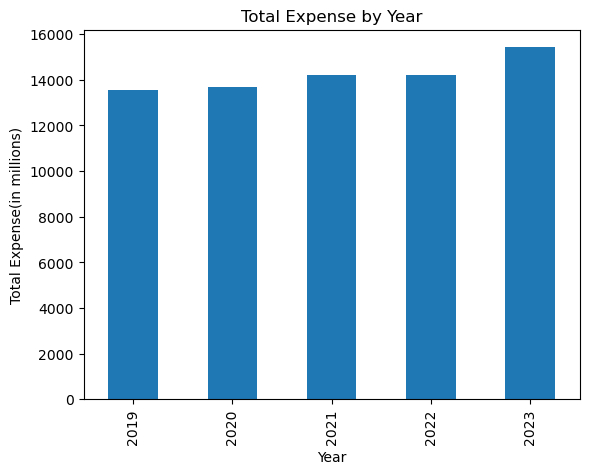

In [1408]:
# Create a bar plot
graph1_ak = total_df_ak.plot(kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Expense by Year")
plt.xlabel("Year")
plt.ylabel("Total Expense(in millions)")

In [1409]:
#Calculating the percentage share by each category
# Add columns for each year
years = ["2019", "2020", "2021", "2022", "2023"]
for year in years:
    percent_df_ak[f"{year}"] = round((merged_df_ak_final[f"Expense {year}(millions)"] / total_df_ak.loc[year,"Total Expense(millions)"]) * 100, 2)

percent_df

TypeError: list indices must be integers or slices, not str

Bar graph for five years, showing analyis by Category Percentage

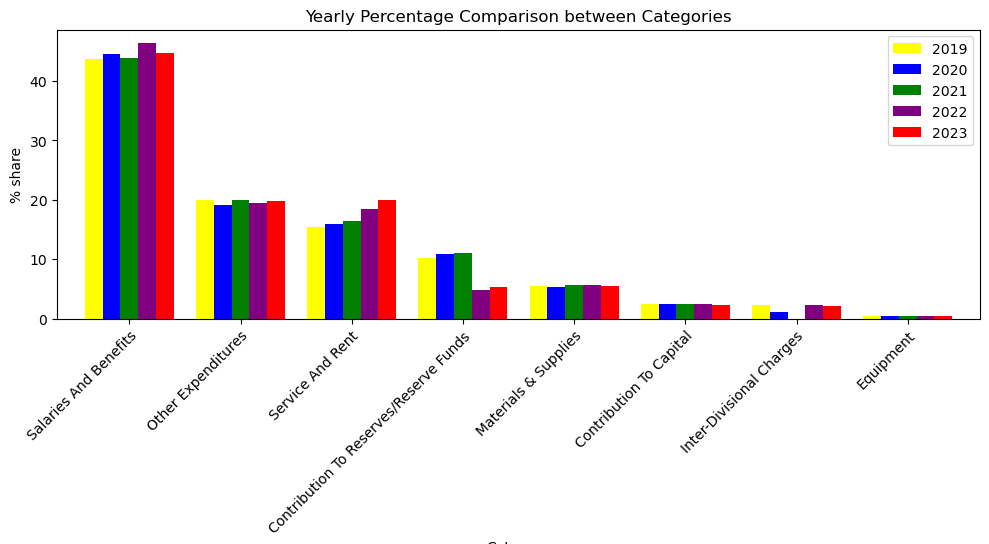

In [824]:
colors = ["yellow", "blue", "green", "purple", "red"]
graph = percent_df.plot(kind="bar", width=0.8, figsize=(10, 5), color=colors,title="Yearly Percentage Comparison between Categories",xlabel="Category",ylabel="% share")
graph.set_xticklabels(percent_df.index,rotation=45,rotation_mode="anchor",ha="right",wrap=True)
plt.tight_layout()
plt.show()

Highest Expense Category for each year

In [1412]:
max_values_ak = []
category_names_ak = []

for year in years:
    max_value_ak = merged_df_ak_final[f"Expense {year}(millions)"].max()
    category_name_ak = merged_df_ak_final.loc[merged_df_ak_final[f"Expense {year}(millions)"].idxmax(), "Category Name"]
    
    max_values_ak.append(max_value_ak)
    category_names_ak.append(category_name_ak)

high_df_ak = pd.DataFrame({
    "Year": years,
    "Highest Category": category_names_ak,
    "Expense Amount": max_values_ak
})

high_df_ak

,Year,Highest Category,Expense Amount
0,2019,Salaries And Benefits,5928.05
1,2020,Salaries And Benefits,6092.48
2,2021,Salaries And Benefits,6232.59
3,2022,Salaries And Benefits,6596.59
4,2023,Salaries And Benefits,6899.58


Lowest Expense Category for each year

In [1414]:
#Filtering the value which are NaN or 0
filtered_df_ak = merged_df_ak_final.copy()
filtered_df_ak.replace(0, np.nan, inplace=True)

#defining variables
min_values_ak = []
category_names_ak = []

for year in years:
    min_value_ak = filtered_df_ak[f"Expense {year}(millions)"].min()
    category_name_ak = filtered_df_ak.loc[filtered_df_ak[f"Expense {year}(millions)"].idxmin(), "Category Name"]

    min_values_ak.append(min_value_ak)
    category_names_ak.append(category_name_ak)

low_df_ak = pd.DataFrame({
    "Year": years,
    "Lowest Category": category_names_ak,
    "Expense Amount": min_values_ak
})
low_df_ak

,Year,Lowest Category,Expense Amount
0,2019,Equipment,62.57
1,2020,Equipment,63.06
2,2021,Equipment,63.06
3,2022,Equipment,69.63
4,2023,Equipment,74.92


Time series data of expense amount over the years for different categories 

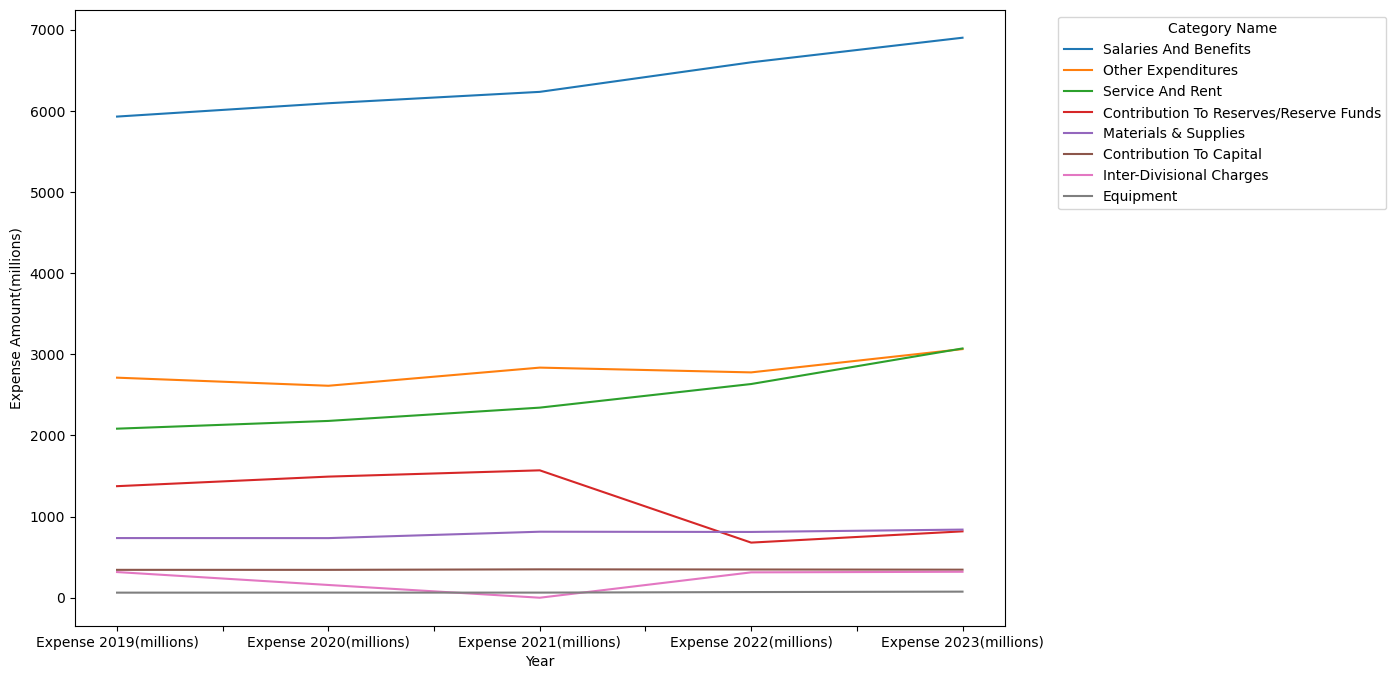

In [1421]:
# Assuming 'Category Name' is the budget category column
time_series_data = merged_df_ak_final.set_index('Category Name').T
time_series_data.plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Expense Amount(millions)')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Correlation matrix of Expense Amount using Seaborn

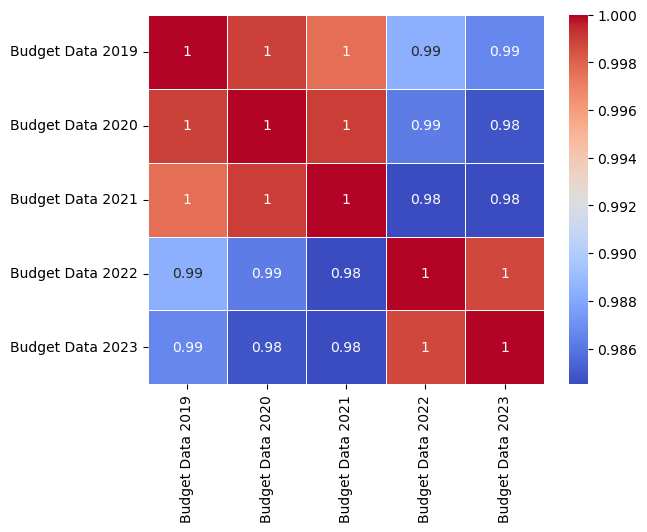

In [634]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = merged_df_ak_final.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [ ]:
Correlation matrix of budget categories across different years

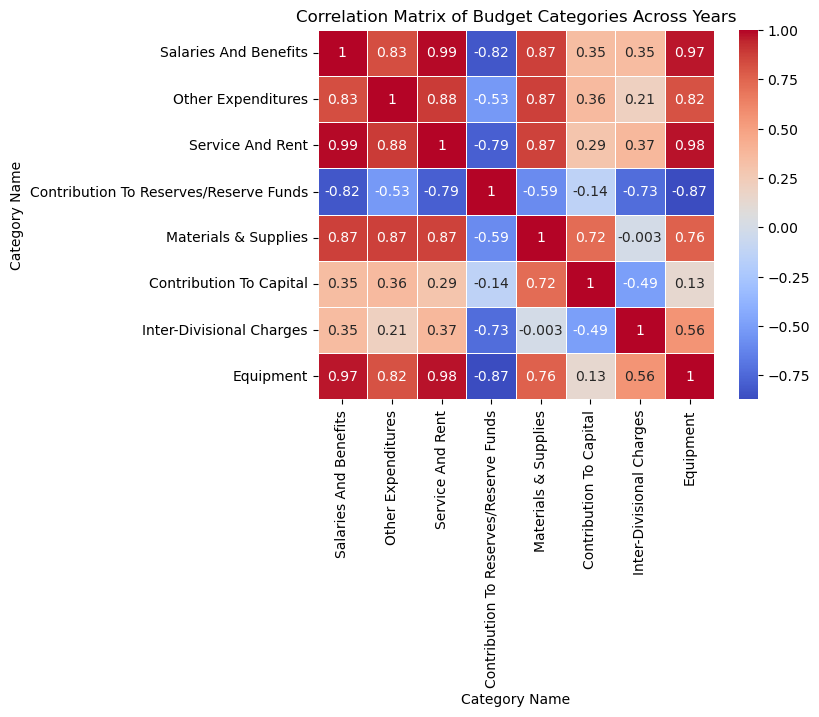

In [635]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame so that categories are rows and years are columns
transposed_df = merged_df_ak_final.set_index('Category Name').T

# Calculate the correlation matrix
correlation_matrix = transposed_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Budget Categories Across Years")
plt.show()

Linear Regression Between Salaries and Benefits over Years

In [1423]:
#Analysing ten years data here
#Reading data from downloaded excel files
budget_path_2014 = Path("approved-operating-budget-summary-2014.xlsx") #2014
budget2014_df = pd.read_excel(budget_path_2014, sheet_name='2014')
budget_path_2015 = Path("approved-operating-budget-summary-2015.xlsx") #2015
budget2015_df = pd.read_excel(budget_path_2015, sheet_name='summary')
budget_path_2016 = Path("approved-operating-budget-summary-2016.xlsx") #2016
budget2016_df = pd.read_excel(budget_path_2016, sheet_name='Open Data Summary')
budget_path_2017 = Path("approved-operating-budget-summary-2017.xlsx") #2017
budget2017_df = pd.read_excel(budget_path_2017, sheet_name='2017')
budget_path_2018 = Path("approved-operating-budget-summary-2018.xlsx") #2018
budget2018_df = pd.read_excel(budget_path_2018, sheet_name='2018')

#Renaming the columns
budget2014_df.rename(columns={2014.0: 'Budgeted amount 2014'}, inplace=True)
budget2015_df.rename(columns={2015.0: 'Budgeted amount 2015'}, inplace=True)
budget2016_df.rename(columns={2016.0: 'Budgeted amount 2016'}, inplace=True)
budget2017_df.rename(columns={2017.0: 'Budgeted amount 2017'}, inplace=True)
budget2018_df.rename(columns={2018.0: 'Budgeted amount 2018'}, inplace=True)

#Dropping duplicates
budget2014_df.drop_duplicates(subset = 'Budgeted amount 2014')
budget2015_df.drop_duplicates(subset = 'Budgeted amount 2015')
budget2016_df.drop_duplicates(subset = 'Budgeted amount 2016')
budget2017_df.drop_duplicates(subset = 'Budgeted amount 2017')
budget2018_df.drop_duplicates(subset = 'Budgeted amount 2018')

#Categorising between expense and revenue DataFrame
budget2014_df_exp = budget2014_df[budget2014_df['Expense/Revenue']=='Expenses']
budget2014_df_rev = budget2014_df[budget2014_df['Expense/Revenue']=='Revenues']
budget2015_df_exp = budget2015_df[budget2015_df['Expense/Revenue']=='Expenses']
budget2015_df_rev = budget2015_df[budget2015_df['Expense/Revenue']=='Revenues']
budget2016_df_exp = budget2016_df[budget2016_df['Expense/Revenue']=='Expenses']
budget2016_df_rev = budget2016_df[budget2016_df['Expense/Revenue']=='Revenues']
budget2017_df_exp = budget2017_df[budget2017_df['Expense/Revenue']=='Expenses']
budget2017_df_rev = budget2017_df[budget2017_df['Expense/Revenue']=='Revenues']
budget2018_df_exp = budget2018_df[budget2018_df['Expense/Revenue']=='Expenses']
budget2018_df_rev = budget2018_df[budget2018_df['Expense/Revenue']=='Revenues']

/Users/anuradhakishore/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [1426]:
# Filtering rows where the "Category Name" is "Salaries And Benefits"
ak_2014_s= round(budget2014_df_exp[budget2014_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2014"].sum()/1000000,2)
ak_2015_s= round(budget2015_df_exp[budget2015_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2015"].sum()/1000000,2)
ak_2016_s = round(budget2016_df_exp[budget2016_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2016"].sum()/1000000,2)
ak_2017_s = round(budget2017_df_exp[budget2017_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2017"].sum()/1000000,2)
ak_2018_s= round(budget2018_df_exp[budget2018_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2018"].sum()/1000000,2)
ak_2019_s= round(budget2019_df_exp[budget2019_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2019"].sum()/1000000,2)
ak_2020_s= round(budget2020_df_exp[budget2020_df_exp["Category Name"] == "SService And Rent"]["Budgeted amount 2020"].sum()/1000000,2)
ak_2021_s = round(budget2021_df_exp[budget2021_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2021"].sum() / 1000000, 2)
ak_2022_s = round(budget2022_df_exp[budget2022_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2022"].sum() / 1000000, 2)
ak_2023_s = round(budget2023_df_exp[budget2023_df_exp["Category Name"] == "Service And Rent"]["Budgeted amount 2023"].sum() / 1000000, 2)

Calculating Salaries and Benefits relationship for 10 Years

In [1476]:
#Defining the new ten year for calculation
years2 = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize an empty dictionary to store the results
ak_values = {}

# Iterate over the years
for year in years2:
    # Construct the DataFrame variable name
    df_variable_name = f"budget{year}_df_exp"
    
    # Check if the DataFrame variable exists
    if df_variable_name in locals():
        # Use the DataFrame variable to calculate the sum
        if year in (2021, 2022, 2023):  # Use 'in' to check membership in the tuple
            ak_value = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries") | (locals()[df_variable_name]["Category Name"] == "Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        else:
            ak_value = round(locals()[df_variable_name][(locals()[df_variable_name]["Category Name"] == "Salaries And Benefits")][f"Budgeted amount {year}"].sum() / 1000000, 2)
        
        # Store the result in the dictionary
        ak_values[f"ak_{year}"] = ak_value
print("Salary and Benfits in Ten years")
# Display the results
for key, value in ak_values.items():
    print(f"{key}: {value}")

Salary and Benfits in Ten years
ak_2014: 5088.15
ak_2015: 5306.23
ak_2016: 5442.21
ak_2017: 5526.44
ak_2018: 5688.31
ak_2019: 5928.05
ak_2020: 6092.48
ak_2021: 6232.59
ak_2022: 6596.59
ak_2023: 6899.58


Linear Regression between Salaries and Benefits for 10 Years

r-squared value is 0.9736713941983182
Linear Regression: 189.24x + -376107.61


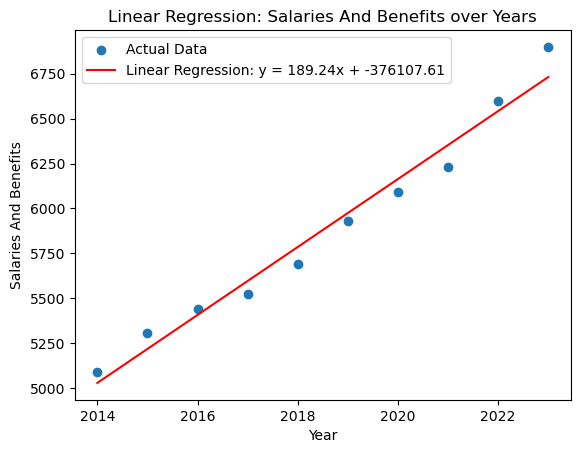

In [1432]:
salaries_and_benefits = [ak_2014,ak_2015,ak_2016,ak_2017,ak_2018,ak_2019,ak_2020,ak_2021,ak_2022,ak_2023]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years2, salaries_and_benefits)

# Create the regression line
regress_values = [slope * year + intercept for year in years2]

# Plot the data and regression line
plt.scatter(years2, salaries_and_benefits, label='Actual Data', marker='o')
plt.plot(years2, regress_values, label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}',color="red")

# Add labels and legend
plt.title('Linear Regression: Salaries And Benefits over Years')
plt.xlabel('Year')
plt.ylabel('Salaries And Benefits')
plt.legend()
print(f"r-squared value is {r_value**2}")
print(f'Linear Regression: {slope:.2f}x + {intercept:.2f}')
# Show the plot
plt.show()

# #Analysing Sub Categories

Creating Datasets for 2019-2023 for Sub Category

In [1472]:


sub_ak_2019 = budget2019_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2019"].sum().reset_index()
max_row_ak_2019 = sub_2019.loc[sub_2019["Budgeted amount 2019"].idxmax()]
min_row_ak_2019 = sub_2019.loc[sub_2019["Budgeted amount 2019"].idxmin()]
sort_ak_2019=(sub_2019.sort_values("Budgeted amount 2019",ascending=False))

sub_ak_2020 = budget2020_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2020"].sum().reset_index()
max_row_ak_2020 = sub_2020.loc[sub_2020["Budgeted amount 2020"].idxmax()]
min_row_ak_2020 = sub_2020.loc[sub_2020["Budgeted amount 2020"].idxmin()]
sort_ak_2020=(sub_2020.sort_values("Budgeted amount 2020",ascending=False))

sub_ak_2021 = budget2021_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2021"].sum().reset_index()
max_row_ak_2021 = sub_2021.loc[sub_2021["Budgeted amount 2021"].idxmax()]
min_row_ak_2021 = sub_2021.loc[sub_2021["Budgeted amount 2021"].idxmin()]
sort_ak_2021=(sub_2021.sort_values("Budgeted amount 2021",ascending=False))

sub_ak_2022 = budget2022_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2022"].sum().reset_index()
max_row_ak_2022 = sub_2022.loc[sub_2022["Budgeted amount 2022"].idxmax()]
min_row_ak_2022 = sub_2022.loc[sub_2022["Budgeted amount 2022"].idxmin()]
sort_ak_2022=(sub_2022.sort_values("Budgeted amount 2022",ascending=False))

sub_ak_2023 = budget2023_df_exp.groupby(["Category Name", "Sub-Category Name"])["Budgeted amount 2023"].sum().reset_index()
max_row_ak_2023 = sub_2023.loc[sub_2023["Budgeted amount 2023"].idxmax()]
min_row_ak_2023 = sub_2023.loc[sub_2023["Budgeted amount 2023"].idxmin()]
sort_ak_2023=(sub_2023.sort_values("Budgeted amount 2023",ascending=False))



print(f"Year 2019: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
print(max_row_ak_2019)
print("--------------------------------------------------------------------------------------")
print(f"Year 2019:Minimum Expense in Sub-Category along with Category Name and Expense Amount")
print(min_row_ak_2019)
print("--------------------------------------------------------------------------------------")
print(f"Year 2020: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
print(max_row_ak_2020)
print("--------------------------------------------------------------------------------------")
print(f"Year 2020:Minimum Expense in Sub-Category along with Category Name and Expense Amount")
print(min_row_ak_2020)
print("--------------------------------------------------------------------------------------")
print(f"Year 2021: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
print(max_row_ak_2021)
print("--------------------------------------------------------------------------------------")
print(f"Year 2021:Minimum Expense in Sub-Category along with Category Name and Expense Amount")
print(min_row_ak_2021)
print("--------------------------------------------------------------------------------------")
print(f"Year 2022: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
print(max_row_ak_2022)
print("--------------------------------------------------------------------------------------")
print(f"Year 2022:Minimum Expense in Sub-Category along with Category Name and Expense Amount")
print(min_row_ak_2022)
print("--------------------------------------------------------------------------------------")
print(f"Year 2023: Maximum Expense in Sub-Category along with Category Name and Expense Amount")
print(max_row_ak_2023)
print("--------------------------------------------------------------------------------------")
print(f"Year 2023:Minimum Expense in Sub-Category along with Category Name and Expense Amount")
print(min_row_ak_2023)
print("--------------------------------------------------------------------------------------")


Year 2019: Maximum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2019            4565806999.47
Name: 30, dtype: object
--------------------------------------------------------------------------------------
Year 2019:Minimum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name                  Allowances
Budgeted amount 2019             732289496.87
Name: 22, dtype: object
--------------------------------------------------------------------------------------
Year 2020: Maximum Expense in Sub-Category along with Category Name and Expense Amount
Category Name           Salaries And Benefits
Sub-Category Name          Permanent Salaries
Budgeted amount 2020            4704520880.64
Name: 30, dtype: object
--------------------------------------------------------------------------------

# Analysing Revenue